In [1]:

import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#del 1
df1 = pd.read_excel ('solve_model1.xlsx',index_col = 0, sheet_name='ARK_navn')
df2 = pd.read_excel ('solve_model1.xlsx', index_col = 0, sheet_name='ARK_navn2')
df3 = pd.read_excel ('solve_model1.xlsx', index_col = 0, sheet_name='ARK_navn3')
df4 = pd.read_excel ('solve_model1.xlsx',index_col = 0, sheet_name='ARK_navn4')
df5 = pd.read_excel ('solve_model1.xlsx', index_col = 0, sheet_name='ARK_navn5')
df6 = pd.read_excel ('solve_model1.xlsx', index_col = 0, sheet_name='ARK_navn6')
#del 2
df7 = pd.read_excel ('solve_model2.xlsx',index_col = 0, sheet_name='ARK_navn')
df8 = pd.read_excel ('solve_model2.xlsx', index_col = 0, sheet_name='ARK_navn2')
df9 = pd.read_excel ('solve_model2.xlsx',index_col = 0, sheet_name='ARK_navn3')
df10 = pd.read_excel ('solve_model2.xlsx', index_col = 0, sheet_name='ARK_navn4')


In [2]:
def rel_df(df):
    df1 = pd.DataFrame()
    for i in range(1,len(df.columns)):

        col = (df.iloc[:,i]/df.iloc[:,0]-1)*100
        df1.loc[:,'shock'+str(i)] = col
    return df1
def rel_bar_plot(name, change, title, water):

    # Figure Size
    fig, ax = plt.subplots(figsize =(16, 9))

    # Horizontal Bar Plot
    ax.barh(name, change)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    ax.set_title(title,
                 loc ='left', )

    # Add Text watermark
    fig.text(0.9, 0.15, water, fontsize = 12,
             color ='grey', ha ='right', va ='bottom',
             alpha = 0.7)

    # Show Plot
    plt.show()

# Del 1

In [3]:
ho_res = pd.concat([df1, df3, df5], axis=1,  ignore_index=True)
ho_rel = rel_df(ho_res[:-3])


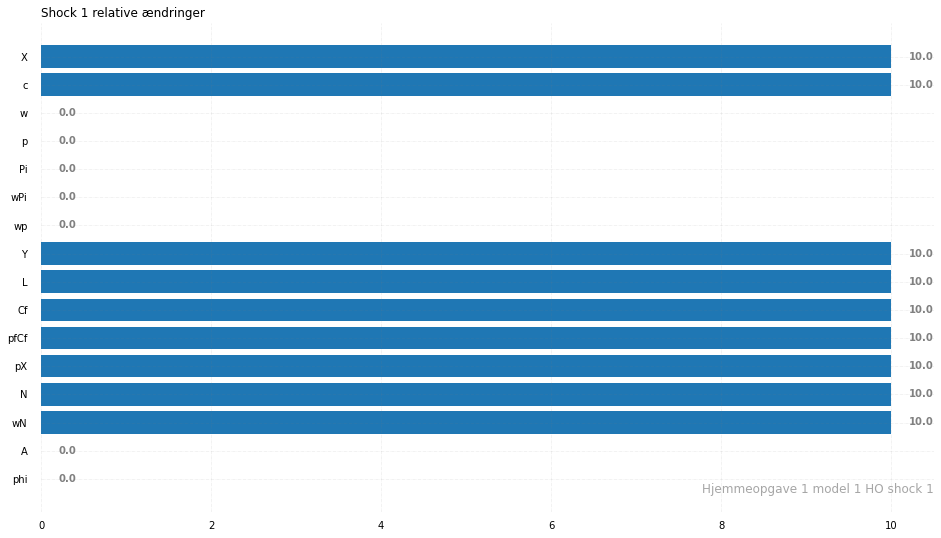

In [4]:
rel_bar_plot(ho_rel['shock1'].index, ho_rel['shock1'],
             'Shock 1 relative ændringer', 'Hjemmeopgave 1 model 1 HO shock 1')

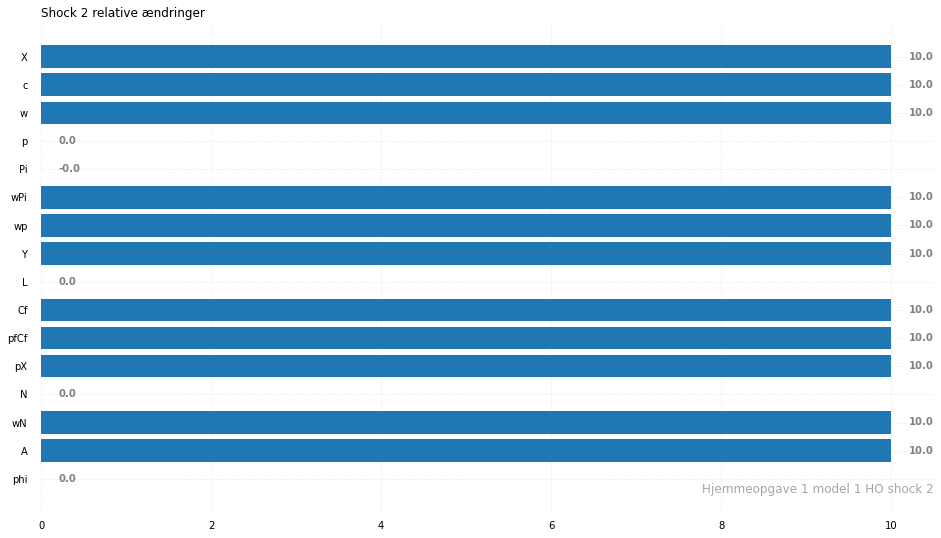

In [5]:
rel_bar_plot(ho_rel['shock2'].index, ho_rel['shock2'],
             'Shock 2 relative ændringer', 'Hjemmeopgave 1 model 1 HO shock 2')

In [6]:
ar_res = pd.concat([df2, df4, df6], axis=1,  ignore_index=True)
ar_rel = rel_df(ar_res[:-3])

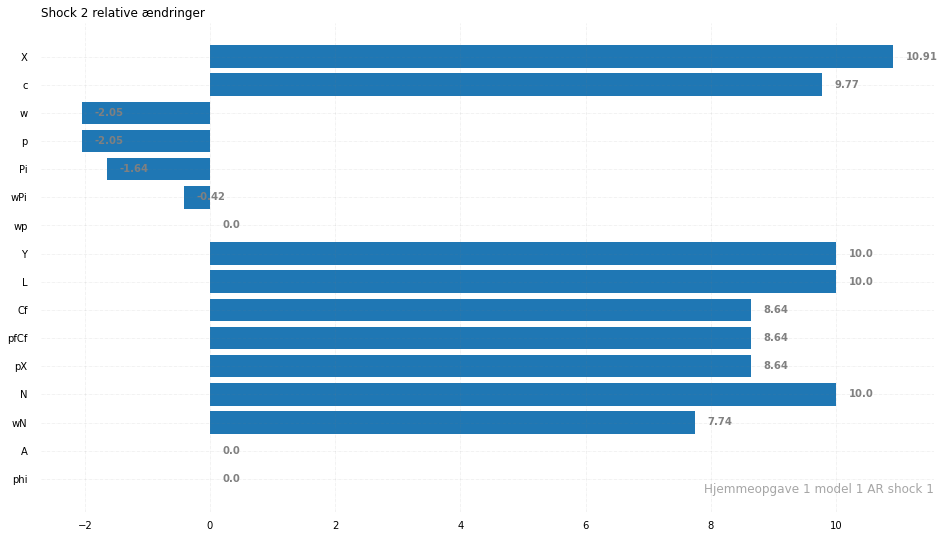

In [7]:
rel_bar_plot(ar_rel['shock1'].index, ar_rel['shock1'],
             'Shock 2 relative ændringer', 'Hjemmeopgave 1 model 1 AR shock 1')

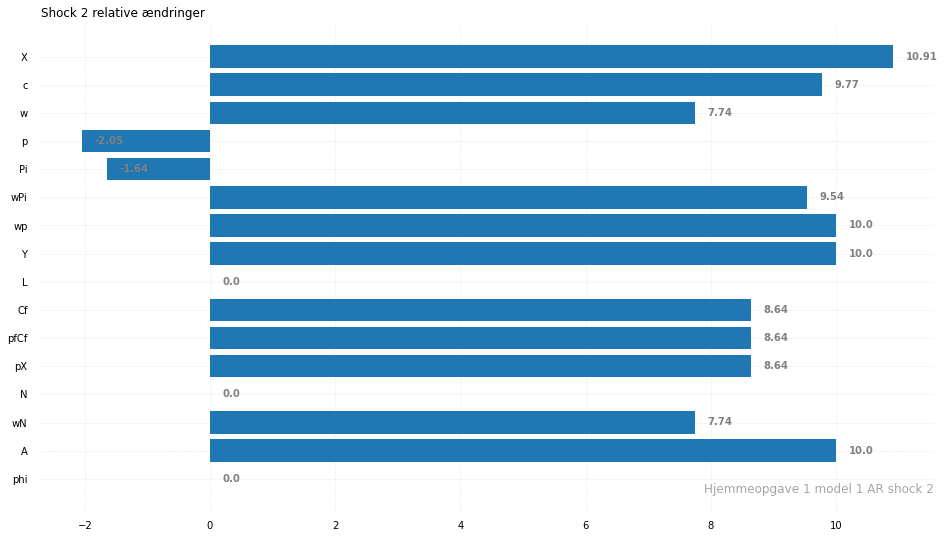

In [8]:
rel_bar_plot(ar_rel['shock2'].index, ar_rel['shock2'],
             'Shock 2 relative ændringer', 'Hjemmeopgave 1 model 1 AR shock 2')

# Del 2

In [9]:
ho_res2 = pd.concat([df7,df9], axis=1,  ignore_index=True)
ho_rel2 = rel_df(ho_res2[:-3])
ar_res2 = pd.concat([df8,df10], axis=1,  ignore_index=True)
ar_rel2 = rel_df(ar_res2[:-3])


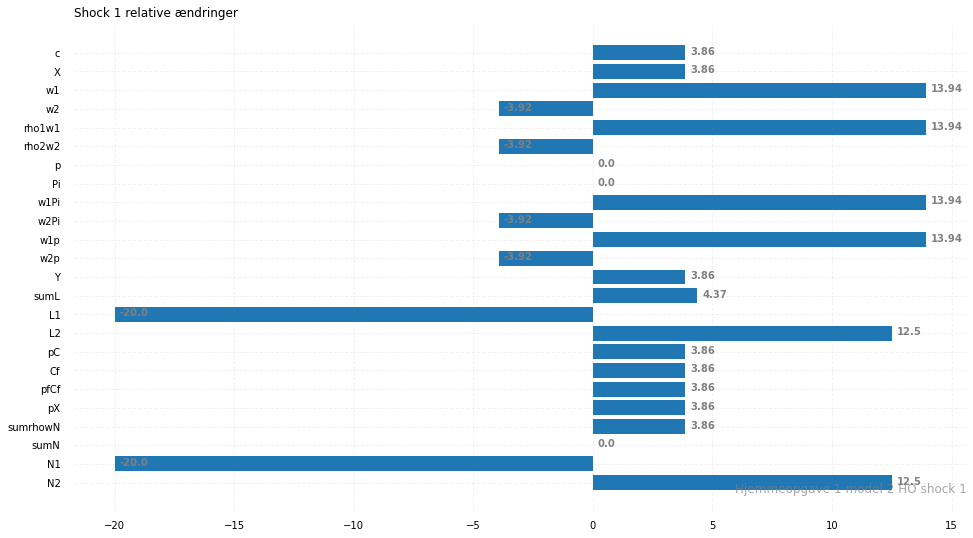

In [10]:
rel_bar_plot(ho_rel2['shock1'].index, ho_rel2['shock1'],
             'Shock 1 relative ændringer', 'Hjemmeopgave 1 model 2 HO shock 1')

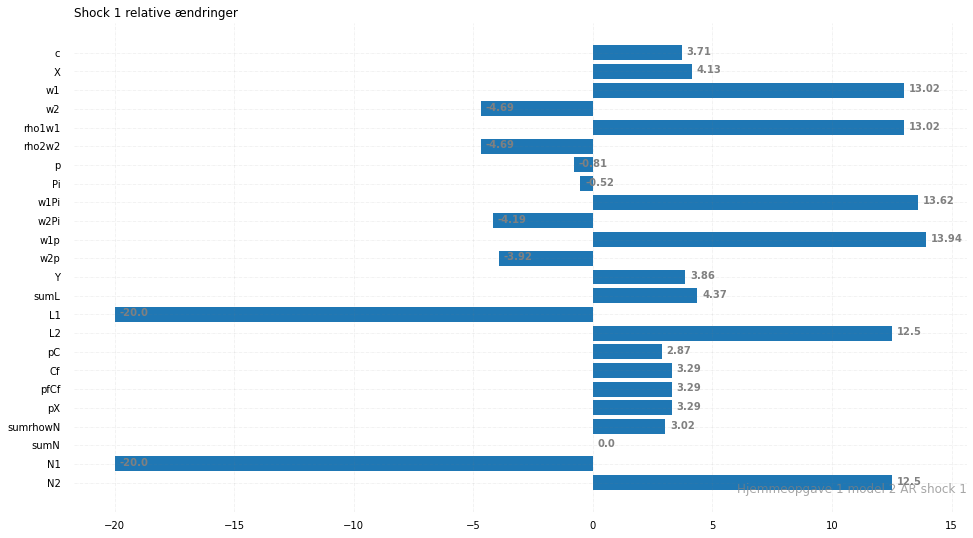

In [11]:
rel_bar_plot(ar_rel2['shock1'].index, ar_rel2['shock1'],
             'Shock 1 relative ændringer', 'Hjemmeopgave 1 model 2 AR shock 1')

In [12]:
evho = ho_res[ho_res.columns[1:]][-3:]
evar = ar_res[ar_res.columns[1:]][-3:]
evho2 = ho_res2[ho_res2.columns[1:]][-3:]
evar2 = ar_res2[ar_res2.columns[1:]][-3:]
evar2


,1
EV,71.253409
EVI,60.391994
EVP,10.861416


In [13]:
EVI1 = list(evho[-2:-1].values[0])
EVI2 = list(evar[-2:-1].values[0])
EVI3 = list(evho2[-2:-1].values[0])
EVI4 = list(evar2[-2:-1].values[0])

EVP1 = list(evho[-2:-1].values[0])
EVP2 = list(evar[-2:-1].values[0])
EVP3 = list(evho2[-2:-1].values[0])
EVP4 = list(evar2[-2:-1].values[0])
Name = ['m1,ho,s1','m1,ho,s2',
        'm1,ar,s1','m1,ar,s2',
        'm2,ho','m2,ar']
EVI=EVI1+EVI2+EVI3+EVI4
EVP=EVP1+EVP2+EVP3+EVP4
df = pd.DataFrame (Name, columns = ['Name'])
df['EVI']=EVI
df['EVP']=EVP

df

,Name,EVI,EVP
0,"m1,ho,s1",100.000000,100.000000
1,"m1,ho,s2",100.000000,100.000000
2,"m1,ar,s1",77.444944,77.444944
3,"m1,ar,s2",77.444944,77.444944
4,"m2,ho",77.137473,77.137473
5,"m2,ar",60.391994,60.391994


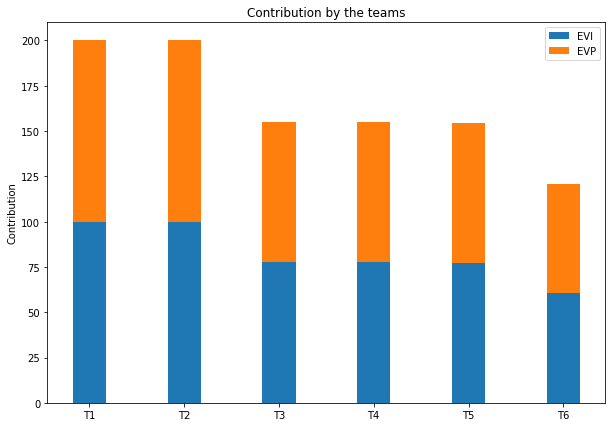

In [14]:
import numpy as np
import matplotlib.pyplot as plt
 
N = len(EVI)

ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, EVI, width)
p2 = plt.bar(ind, EVP, width,
             bottom = EVI)
 
plt.ylabel('Contribution')
plt.title('Contribution by the teams')
plt.xticks(ind, ('T1', 'T2', 'T3', 'T4', 'T5','T6',))

plt.legend((p1[0], p2[0]), ('EVI', 'EVP'))
 
plt.show()